In [3]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix 

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import scale


import matplotlib.pyplot as plt
from pylab import rcParams




import seaborn as sb
sb.set_style('whitegrid')

from collections import Counter
print('imported')



imported


In [4]:
df = pd.read_csv('/Users/jissyAK/Downloads/Data-Collisions.csv')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

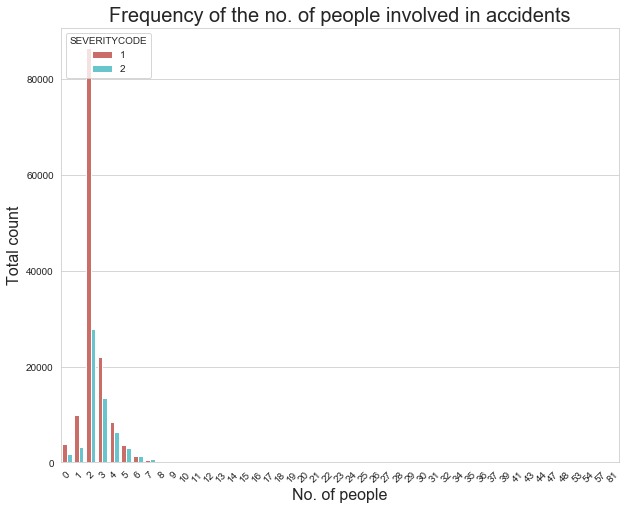

In [6]:
# To show the no. of people involved in accidents. Max no. of accidents correspond to involving two people
%matplotlib inline
rcParams['figure.figsize'] = 10,8

plt.xticks(rotation=45)

ax = sb.countplot(x='PERSONCOUNT', hue='SEVERITYCODE', data=df, palette ='hls')
ax.set_title('Frequency of the no. of people involved in accidents', fontsize = 20)
ax.set_xlabel('No. of people', fontsize=16)
ax.set_ylabel('Total count', fontsize=16)

plt.savefig('PRSON_COUNT.png', dpi=300, bbox_inches='tight')

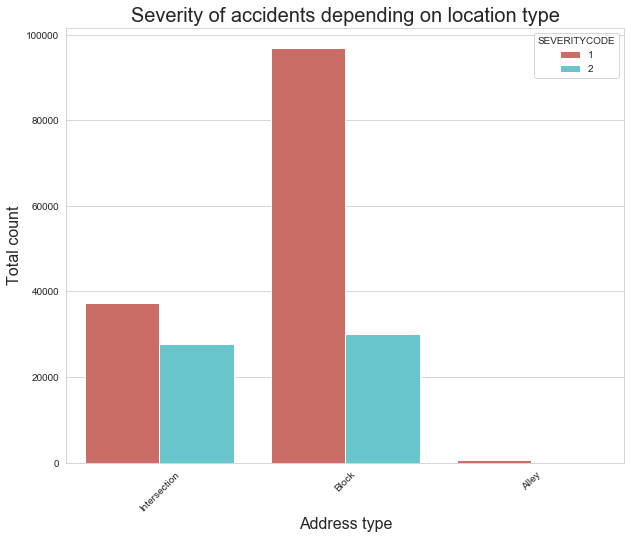

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

# To show the affect of ADDRTYPE on accident severity. 

plt.xticks(rotation=45)

ax = sb.countplot(x='ADDRTYPE', hue='SEVERITYCODE', data=df, palette ='hls')
ax.set_title('Severity of accidents depending on location type', fontsize = 20)
ax.set_xlabel('Address type', fontsize=16)
ax.set_ylabel('Total count', fontsize=16)

plt.savefig('loc.png', dpi=300, bbox_inches='tight')





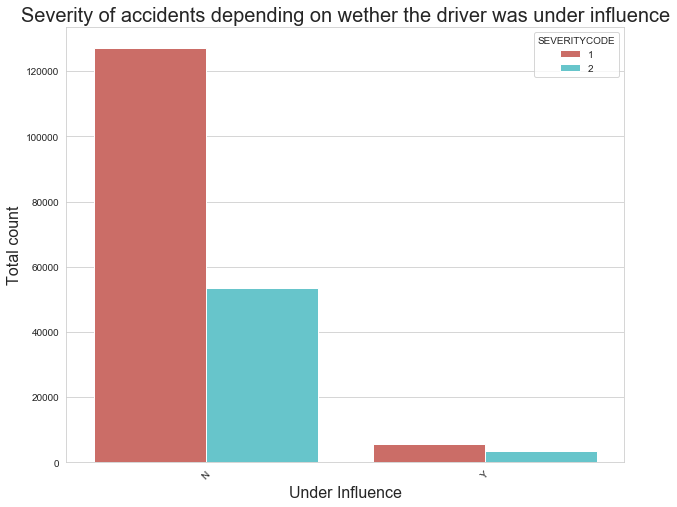

In [55]:
# To show the affect of driver being under influence on accident severity. 

# Both No & 0, indicate not under influence. 
#To consider both as same 0, is replaced by N. Similarly for 1 nd Y

df['UNDERINFL'] = df['UNDERINFL'].replace(['0'], 'N')
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'], 'Y')


%matplotlib inline
rcParams['figure.figsize'] = 10,8

plt.xticks(rotation=45)

ax = sb.countplot(x='UNDERINFL', hue='SEVERITYCODE', data=df, palette ='hls')
ax.set_title('Severity of accidents depending on wether the driver was under influence', fontsize = 20)
ax.set_xlabel('Under Influence', fontsize=16)
ax.set_ylabel('Total count', fontsize=16)

plt.savefig('under_infl.png', dpi=300, bbox_inches='tight')

In [9]:
# choosing the data we will work with
test = ['SEVERITYCODE', 'SPEEDING','COLLISIONTYPE', 'OBJECTID', 'ROADCOND', 'LIGHTCOND']
df2 = df[test]

# obtaining data dimensions
for feature in ['SEVERITYCODE', 'SPEEDING', 'COLLISIONTYPE', 'ROADCOND', 'OBJECTID', 'LIGHTCOND']:
    print(df2[feature].unique())

[2 1]
[nan 'Y']
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
['Wet' 'Dry' nan 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
[     1      2      3 ... 219545 219546 219547]
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' nan
 'Unknown' 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


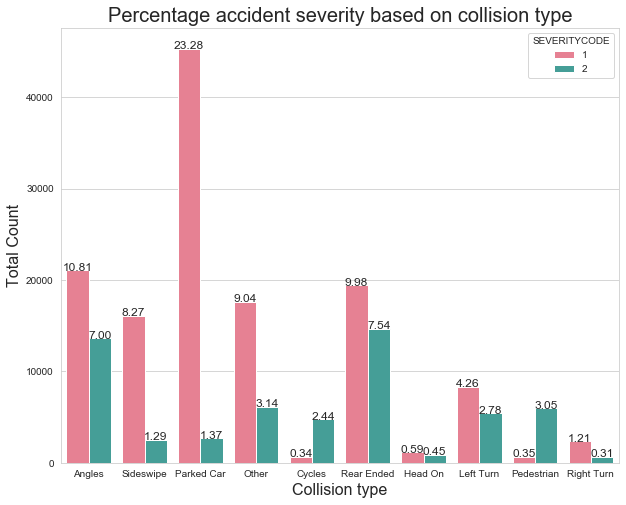

In [10]:
# To show the affect of collision type on accident severity. 

ax = sb.countplot(data=df2,x='COLLISIONTYPE',hue='SEVERITYCODE', palette='husl')
total = float(len(df2))

for p in ax.patches:
    height = p.get_height()
    ax.text((p.get_x()+p.get_width()/2.),
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center", fontsize=12) 
    
ax.set_xlabel('Collision type', fontsize = 16)
ax.set_ylabel('Total Count', fontsize =16)
ax.set_title('Percentage accident severity based on collision type', fontsize =20)

plt.savefig('collisionType.png', dpi=300, bbox_inches='tight')

    
plt.show()

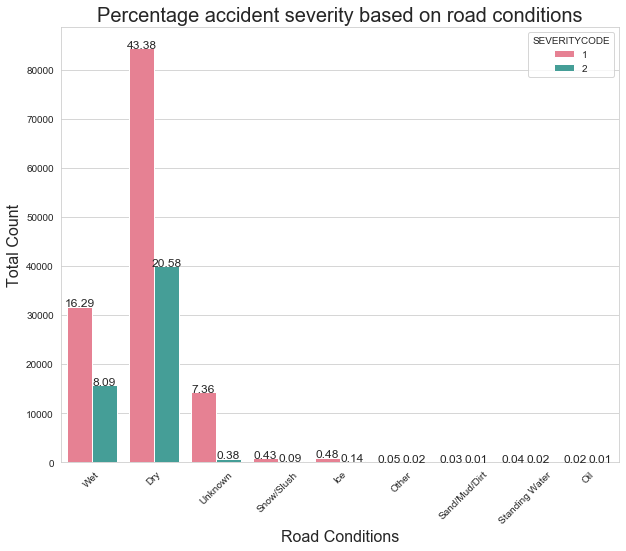

In [11]:
%matplotlib inline
rcParams['figure.figsize'] = 10,8

sb.set_style('whitegrid')


plt.xticks(rotation=45)

# Plotting the effect of road conditions on accident severity

ax = sb.countplot(data=df2,x='ROADCOND',hue='SEVERITYCODE', palette ='husl')
total = float(len(df2))

for p in ax.patches:
    height = p.get_height()
    ax.text((p.get_x()+p.get_width()/2.),
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center", fontsize=12) 
    
ax.set_xlabel('Road Conditions', fontsize = 16)
ax.set_ylabel('Total Count', fontsize =16)
ax.set_title('Percentage accident severity based on road conditions', fontsize =20)
    
plt.savefig('Road_cond.png', dpi=300, bbox_inches='tight')
plt.show()



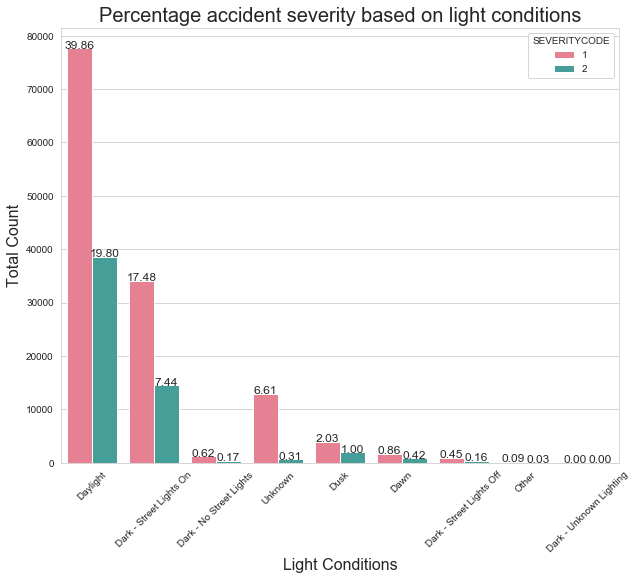

In [12]:
plt.xticks(rotation=45)

# Plotting the effect of light conditions on accident severity

ax = sb.countplot(data=df2,x='LIGHTCOND',hue='SEVERITYCODE', palette ='husl')
total = float(len(df2))


for p in ax.patches:
    height = p.get_height()
    ax.text((p.get_x()+p.get_width()/2.),
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center", fontsize=12) 
    
ax.set_xlabel('Light Conditions', fontsize = 16)
ax.set_ylabel('Total Count', fontsize =16)
ax.set_title('Percentage accident severity based on light conditions', fontsize =20)
    
plt.savefig('Light_cond.png', dpi=300, bbox_inches='tight')

plt.show()


In [13]:
df2['SEVERITYCODE'].value_counts()

# The data is not balanced


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [14]:
# Balancing data using downsampling

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df2[df2.SEVERITYCODE==1]
df_minority = df2[df2.SEVERITYCODE==2]
 
# Downsample majority class
df2_maj_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=58188,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df2_downsampled = pd.concat([df2_maj_downsampled, df_minority])
 
# Display new class counts
df2_downsampled.SEVERITYCODE.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [15]:
df2_downsampled.isnull().sum()

# To replace nan in speeding N representing No speeding.

df2_downsampled['SPEEDING'] = df2_downsampled['SPEEDING'].fillna('N')

for feature in ['SPEEDING', 'COLLISIONTYPE', 'ROADCOND', 'LIGHTCOND']:
    print(df2_downsampled[feature].unique())

['N' 'Y']
['Angles' 'Sideswipe' 'Head On' 'Other' nan 'Left Turn' 'Parked Car'
 'Rear Ended' 'Right Turn' 'Cycles' 'Pedestrian']
['Wet' 'Dry' 'Unknown' nan 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
['Dark - Street Lights On' 'Daylight' 'Unknown' nan 'Dusk' 'Dawn'
 'Dark - No Street Lights' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


In [16]:
# Dropping nan values

df2_downsampled.dropna(inplace=True)
df2_downsampled.reset_index(inplace=True, drop=True)
print(df2_downsampled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113479 entries, 0 to 113478
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   113479 non-null  int64 
 1   SPEEDING       113479 non-null  object
 2   COLLISIONTYPE  113479 non-null  object
 3   OBJECTID       113479 non-null  int64 
 4   ROADCOND       113479 non-null  object
 5   LIGHTCOND      113479 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.2+ MB
None


In [17]:
for feature in ['SPEEDING', 'COLLISIONTYPE', 'ROADCOND']:
    print(df2_downsampled[feature].unique())
    
# obtaining data dimensions  
print(df2_downsampled.info())
    

['N' 'Y']
['Angles' 'Sideswipe' 'Head On' 'Other' 'Left Turn' 'Parked Car'
 'Rear Ended' 'Right Turn' 'Cycles' 'Pedestrian']
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113479 entries, 0 to 113478
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SEVERITYCODE   113479 non-null  int64 
 1   SPEEDING       113479 non-null  object
 2   COLLISIONTYPE  113479 non-null  object
 3   OBJECTID       113479 non-null  int64 
 4   ROADCOND       113479 non-null  object
 5   LIGHTCOND      113479 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.2+ MB
None


In [18]:
print(df2_downsampled['ROADCOND'].value_counts())

Dry               75924
Wet               29342
Unknown            6784
Ice                 676
Snow/Slush          527
Other                83
Standing Water       57
Sand/Mud/Dirt        47
Oil                  39
Name: ROADCOND, dtype: int64


In [19]:
print(df2_downsampled['LIGHTCOND'].value_counts())

Daylight                    71483
Dark - Street Lights On     29118
Unknown                      6052
Dusk                         3589
Dawn                         1535
Dark - No Street Lights       866
Dark - Street Lights Off      702
Other                         127
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64


In [20]:
# Replaced Unknown with the most occuring value (maybe not the best option!) 
df2_downsampled['ROADCOND'] = df2_downsampled['ROADCOND'].replace(['Unknown'], 'Dry')
df2_downsampled['LIGHTCOND'] = df2_downsampled['LIGHTCOND'].replace(['Unknown'], 'Daylight')

In [21]:
#print(df2_downsampled['ROADCOND'].value_counts())
#print(df2_downsampled['LIGHTCOND'].value_counts())

In [22]:
# To check there are no null values
df2_downsampled.isnull().sum()

SEVERITYCODE     0
SPEEDING         0
COLLISIONTYPE    0
OBJECTID         0
ROADCOND         0
LIGHTCOND        0
dtype: int64

In [23]:
#To convert the features from object to int type, encoders are used

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

coll_cat = df2_downsampled['COLLISIONTYPE']

coll_encoded = label_encoder.fit_transform(coll_cat)

#To display value in the array: coll_encoded
#coll_encoded[60:100]

# To determine the first instance of a code
#itemindex1 = np.where(coll_encoded==9)
#itemindex1

from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(categories='auto')

coll_1hot = binary_encoder.fit_transform(coll_encoded.reshape(-1, 1))
coll_1hot_mat = coll_1hot.toarray()

coll_DF = pd.DataFrame(coll_1hot_mat, columns = ['Angles', 'Cycles', 'Head-On', 'LT', 'Other', 'Parked', 'Pedestrian', 'Rear', 'RT', 'sidesweep'])

coll_DF.head()

,Angles,Cycles,Head-On,LT,Other,Parked,Pedestrian,Rear,RT,sidesweep
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Labe encoding for Road Conditions
road_cat = df2_downsampled['ROADCOND']

road_encoded = label_encoder.fit_transform(road_cat)
#road_encoded[747:800]
# To determine the first instance of a code
#itemindex = np.where(road_encoded==6)
#itemindex

road_1hot = binary_encoder.fit_transform(road_encoded.reshape(-1, 1))
road_1hot_mat = road_1hot.toarray()

road_DF = pd.DataFrame(road_1hot_mat, columns = ['Dry', 'Ice', 'Oil', 'other', 'Mud', 'Snow', 'Water',  'Wet'])

road_DF.head()


,Dry,Ice,Oil,other,Mud,Snow,Water,Wet
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Encoding data for speeding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

speed_cat= df2_downsampled['SPEEDING']

speed_encoded = label_encoder.fit_transform(speed_cat)

speed_encoded[0:100]

speed_DF = pd.DataFrame(speed_encoded, columns = ['Speeding'])

In [26]:
df2.head()

,SEVERITYCODE,SPEEDING,COLLISIONTYPE,OBJECTID,ROADCOND,LIGHTCOND
0,2,NaN,Angles,1,Wet,Daylight
1,1,NaN,Sideswipe,2,Wet,Dark - Street Lights On
2,1,NaN,Parked Car,3,Dry,Daylight
3,1,NaN,Other,4,Dry,Daylight
4,2,NaN,Angles,5,Wet,Daylight


In [27]:
# Label encoding for Light conditions
light_cat = df2_downsampled['LIGHTCOND']

light_encoded = label_encoder.fit_transform(light_cat)

light_1hot = binary_encoder.fit_transform(light_encoded.reshape(-1, 1))
light_1hot_mat = light_1hot.toarray()

light_DF = pd.DataFrame(light_1hot_mat, columns = ['Dark-NO-Lights', 'Dark-LightsOFF', 'Dark-LightsON', 'Dark-Unknnown', 'Dawn', 'Day', 'Dusk', 'Oth', ])

light_DF.head()

,Dark-NO-Lights,Dark-LightsOFF,Dark-LightsON,Dark-Unknnown,Dawn,Day,Dusk,Oth
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
#df2.drop(['ROADCOND', 'SPEEDING', 'COLLISIONTYPE'], axis=1, inplace = True)
#df3 = pd.concat([df2, road_DF, speed_DF, coll_DF], axis=1, verify_integrity=True).astype(float)

#plt.figure(figsize=(9,5))
#sb.heatmap(df3.corr(),linewidths=.1
#           ,cmap="YlGnBu")
#plt.show()

In [29]:
#dROPPING COLUMS WITH OBJECT TYPE DATA

df2_downsampled.drop(['ROADCOND', 'SPEEDING', 'COLLISIONTYPE', 'LIGHTCOND'], axis=1, inplace = True)
# Creating dataframe with only float type data

df3 = pd.concat([df2_downsampled, road_DF, speed_DF, coll_DF, light_DF], axis=1, verify_integrity=True).astype(float)


In [30]:
df3

,SEVERITYCODE,OBJECTID,Dry,Ice,Oil,other,Mud,Snow,Water,Wet,...,RT,sidesweep,Dark-NO-Lights,Dark-LightsOFF,Dark-LightsON,Dark-Unknnown,Dawn,Day,Dusk,Oth
0,1.0,29626.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,71557.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,94574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,172907.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,70842.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113474,2.0,219536.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113475,2.0,219539.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113476,2.0,219543.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113477,2.0,219545.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df3.drop(['OBJECTID'], axis=1, inplace = True)


In [32]:
df3.head()
print(df3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113479 entries, 0 to 113478
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    113479 non-null  float64
 1   Dry             113479 non-null  float64
 2   Ice             113479 non-null  float64
 3   Oil             113479 non-null  float64
 4   other           113479 non-null  float64
 5   Mud             113479 non-null  float64
 6   Snow            113479 non-null  float64
 7   Water           113479 non-null  float64
 8   Wet             113479 non-null  float64
 9   Speeding        113479 non-null  float64
 10  Angles          113479 non-null  float64
 11  Cycles          113479 non-null  float64
 12  Head-On         113479 non-null  float64
 13  LT              113479 non-null  float64
 14  Other           113479 non-null  float64
 15  Parked          113479 non-null  float64
 16  Pedestrian      113479 non-null  float64
 17  Rear      

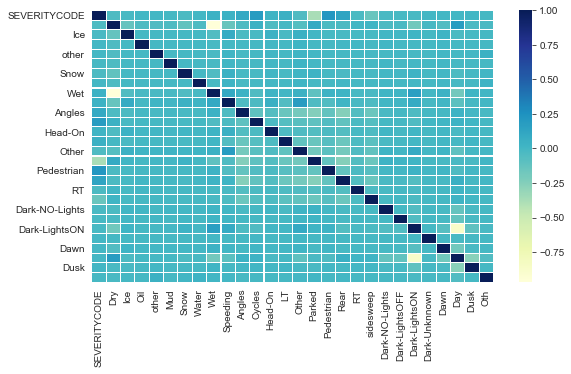

In [33]:
plt.figure(figsize=(9,5))
sb.heatmap(df3.corr(),linewidths=.1
           ,cmap="YlGnBu")
plt.show()

In [34]:
df3.columns

Index(['SEVERITYCODE', 'Dry', 'Ice', 'Oil', 'other', 'Mud', 'Snow', 'Water',
       'Wet', 'Speeding', 'Angles', 'Cycles', 'Head-On', 'LT', 'Other',
       'Parked', 'Pedestrian', 'Rear', 'RT', 'sidesweep', 'Dark-NO-Lights',
       'Dark-LightsOFF', 'Dark-LightsON', 'Dark-Unknnown', 'Dawn', 'Day',
       'Dusk', 'Oth'],
      dtype='object')

In [35]:
df3.head()

,SEVERITYCODE,Dry,Ice,Oil,other,Mud,Snow,Water,Wet,Speeding,...,RT,sidesweep,Dark-NO-Lights,Dark-LightsOFF,Dark-LightsON,Dark-Unknnown,Dawn,Day,Dusk,Oth
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# Splitting data into training set (33%) and test set
x_train, x_test, y_train, y_test = train_test_split(df3.drop('SEVERITYCODE', axis=1),
                                                   df3['SEVERITYCODE'], test_size = 0.33,
                                                   random_state = 200)

In [39]:
print(x_train.shape)

(76030, 27)


In [40]:
print(y_train.shape)

(76030,)


In [41]:
x_train[0:5]

,Dry,Ice,Oil,other,Mud,Snow,Water,Wet,Speeding,Angles,...,RT,sidesweep,Dark-NO-Lights,Dark-LightsOFF,Dark-LightsON,Dark-Unknnown,Dawn,Day,Dusk,Oth
32948,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103691,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
# Initiating Logistic Regression instance

log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred= log_reg.predict(x_test)
print(classification_report(y_test, y_pred))
LR_f1 = f1_score(y_test, y_pred)
LR_acc = accuracy_score(y_test, y_pred)
LR_reca = recall_score(y_test, y_pred)
y_pred


#Report for the Logistic Regression Model

              precision    recall  f1-score   support

         1.0       0.76      0.60      0.67     18557
         2.0       0.68      0.81      0.74     18892

    accuracy                           0.71     37449
   macro avg       0.72      0.71      0.70     37449
weighted avg       0.72      0.71      0.71     37449



array([1., 2., 1., ..., 1., 2., 2.])

In [44]:
y_train_pred = cross_val_predict(log_reg, x_train, y_train, cv = 10)
confusion_matrix(y_train, y_train_pred)


array([[22518, 15333],
       [ 7227, 30952]])

In [45]:
#Precision of LogisticRegression Model

precision_score(y_train, y_train_pred)


0.7570347957639939

In [46]:
df3[862:863]

,SEVERITYCODE,Dry,Ice,Oil,other,Mud,Snow,Water,Wet,Speeding,...,RT,sidesweep,Dark-NO-Lights,Dark-LightsOFF,Dark-LightsON,Dark-Unknnown,Dawn,Day,Dusk,Oth
862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
df3.iloc[862,27]

0.0

In [48]:
 test = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 
                  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0   ]).reshape(1,-1)

In [49]:
print(log_reg.predict(test))

[1.]


In [50]:
#How well can the model predict correct severity code for the test set 

print(log_reg.predict_proba(test))

[[0.5752206 0.4247794]]


In [51]:
#K.nearest Neigbors model

KNN_model = KNeighborsClassifier(n_neighbors = 12).fit(x_train, y_train)
predicted = KNN_model.predict(x_test)
KNN_f1 = f1_score(y_test, predicted)
KNN_acc = accuracy_score(y_test, predicted)
KNN_reca = recall_score(y_test, predicted)
print(y_test)
print(predicted)
print(classification_report(y_test, predicted))

10092     1.0
63431     2.0
106728    2.0
12618     1.0
39464     1.0
         ... 
92534     2.0
4389      1.0
68301     2.0
36652     1.0
94531     2.0
Name: SEVERITYCODE, Length: 37449, dtype: float64
[1. 2. 1. ... 1. 2. 2.]
              precision    recall  f1-score   support

         1.0       0.64      0.71      0.67     18557
         2.0       0.68      0.61      0.64     18892

    accuracy                           0.66     37449
   macro avg       0.66      0.66      0.66     37449
weighted avg       0.66      0.66      0.66     37449



In [52]:
#Decision Tree Model
Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree_model.fit(x_train, y_train)
predicted = Tree_model.predict(x_test)
Tree_f1 = f1_score(y_test, predicted)
Tree_acc = accuracy_score(y_test, predicted)
Tree_reca = recall_score(y_test, predicted)
print(y_test)
print(predicted)
print(classification_report(y_test, predicted))
Tree_f1


10092     1.0
63431     2.0
106728    2.0
12618     1.0
39464     1.0
         ... 
92534     2.0
4389      1.0
68301     2.0
36652     1.0
94531     2.0
Name: SEVERITYCODE, Length: 37449, dtype: float64
[2. 2. 1. ... 1. 2. 2.]
              precision    recall  f1-score   support

         1.0       0.84      0.47      0.60     18557
         2.0       0.64      0.91      0.75     18892

    accuracy                           0.69     37449
   macro avg       0.74      0.69      0.68     37449
weighted avg       0.74      0.69      0.68     37449



0.6020629937558216

In [56]:
# Random Forest

RDF= RandomForestClassifier(bootstrap=True,
            class_weight="balanced_subsample", 
            criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=True,
            random_state=35,
            verbose=0, warm_start=False)

RDF.fit(x_train, y_train)
RDF_pred = RDF.predict(x_test)
RDF_f1 = f1_score(y_test, predicted)
RDF_acc = accuracy_score(y_test, predicted)
RDF_reca = recall_score(y_test, predicted)
print(y_test)
print(RDF_pred)
print(classification_report(y_test, RDF_pred))


10092     1.0
63431     2.0
106728    2.0
12618     1.0
39464     1.0
         ... 
92534     2.0
4389      1.0
68301     2.0
36652     1.0
94531     2.0
Name: SEVERITYCODE, Length: 37449, dtype: float64
[1. 2. 1. ... 1. 2. 2.]
              precision    recall  f1-score   support

         1.0       0.76      0.61      0.67     18557
         2.0       0.68      0.81      0.74     18892

    accuracy                           0.71     37449
   macro avg       0.72      0.71      0.71     37449
weighted avg       0.72      0.71      0.71     37449



In [57]:
# Comparing the diff models

results = {
    "Method of Analisys": ["KNN", "Decision Tree", "LogisticRegression", "RandomForest"],
    "F1-score": [KNN_f1, Tree_f1, LR_f1, RDF_f1],
    "Accuracy": [KNN_acc, Tree_acc, LR_acc, RDF_f1],
    "Recall": [KNN_reca, Tree_reca, LR_reca, RDF_reca]
    
}

results = pd.DataFrame(results)
results

,Method of Analisys,F1-score,Accuracy,Recall
0,KNN,0.674533,0.659697,0.711645
1,Decision Tree,0.602063,0.691981,0.470227
2,LogisticRegression,0.671544,0.708670,0.601013
3,RandomForest,0.602063,0.602063,0.470227
